### 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

#### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
#### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
#### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

### [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片  

### [作業重點]
- 從網頁上讀取連結清單  
- 從清單網址讀取圖片

In [1]:
url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [2]:
import requests
response = requests.get(url)
data = response.text
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"
data_split = data.split(split_tag)

# 因split後的最後一個會為空值,所以不取最後一個
data_split = data_split[:-1]

# 目前切割的結果包含序號和url,所以要進一步拆分成兩個部分
number=[]
url=[]
for i in range(len(data_split)):
    new_list=data_split[i].split("\t")
    number.append(new_list[0])
    url.append(new_list[1])
    
url[:5]

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

### 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
df = pd.DataFrame()
df["number"] = number
df["url"] = url
df.head()

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


### 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

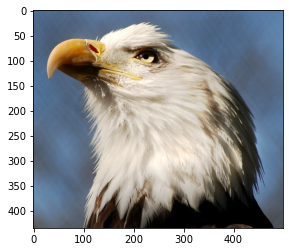

In [5]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 使用 df.loc[]得到第一筆資料的連結
first_link = df.loc[0,"url"]
response = requests.get(first_link)

# Image.open需要二進制的形式,使用BytesIO轉換
img = Image.open(BytesIO(response.content))

# 將img轉換成numpy array
img = np.array(img)
plt.imshow(img)
plt.show()

In [6]:
def img2arr_fromURLs(url_list, resize = False):
    """
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for i in url_list:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img_array = np.array(img)
        img_list.append(img_array)  
    return img_list

Total images that we got: 4


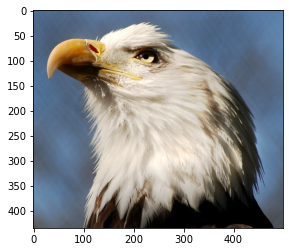

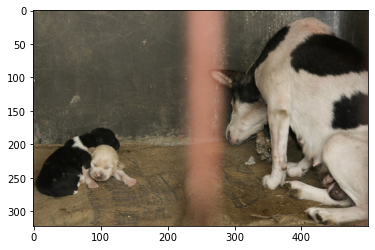

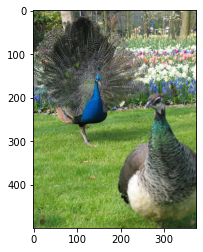

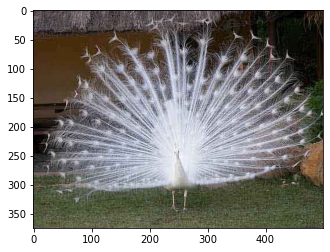

In [7]:
result = img2arr_fromURLs((df[0:4]["url"].values))
print("Total images that we got: {}".format(len(result))) # 如果不等於5,代表有些連結失效,所以改取前四個

for img in result:
    plt.imshow(img)
    plt.show()